# Apéndice 1: Costos de Importación para Aireadores a Ecuador entre 2017 y 2023

Con la finalidad de respaldar las afirmaciones hechas en este trabajo, detallamos nuestra metodología para validar nuestras hipotesis

### 1. Obtención de Datos

Disponible en: [https://engines.datasur.com/](https://engines.datasur.com/)

La plataforma proporciona información aduanera para diversos países de Latinoamérica, incluyendo Ecuador. A través de ella, obtuvimos datos detallados sobre la importación de aireadores, equipos esenciales para la suplementación de oxígeno en el cultivo de camarón, entre los años 2017 y 2023.

La interfaz de usuario permite exportar búsquedas anualizadas aplicando diversos filtros, lo cual facilitó la obtención de la información necesaria para este análisis.

#### 1.1. Metodología para el Análisis

Se optó por trabajar sobre los años 2017 a 2023 por las siguientes razones:

1. La información del año en curso (2024) no está completa de enero a diciembre, lo cual dificultaría el cruce de datos con las exportaciones, que presentan un retraso de aproximadamente 7 meses con respecto a la fecha actual.

2. Los años 2010 a 2012 presentan un esquema de datos distinto, con Scolumnas adicionales que no están disponibles en periodos posteriores, además de contener información obsoleta, como columnas dedicadas a Fax, que no son relevantes para el presente análisis.

3. Entre 2013 y 2016, aunque los datos son más completos, carecen de detalles fundamentales como la información específica del modelo de aireador, lo cual es esencial para el enfoque de nuestra investigación.

4. Los datos más recientes ofrecen información más relevante para el presente contexto, evitando la necesidad de normalizar múltiples años de inflación acumulada, lo cual podría introducir sesgos debido a la captura de otros factores no controlados en este trabajo.

#### 1.2. Herramientas Empleadas

El procesamiento de los datos se realizó utilizando Python, un lenguaje de programación altamente adecuado para estas tareas, que ha ganado una creciente popularidad y aplicabilidad en los últimos años debido a su flexibilidad y efectividad.

El procedimiento se llevó a cabo siguiendo los pasos detallados a continuación:

1. **Inspección inicial**: Los archivos exportados en formato CSV fueron cargados en un entorno de desarrollo integrado (IDE) para visualizar la estructura de los datos, realizar el conteo de valores faltantes, verificar la formateación y analizar la cantidad de filas y columnas.

2. **Limpieza y formateación**: Se abordaron problemas de inconsistencia tales como duplicados, columnas con nombres diferentes para el mismo tipo de información en distintos años, espacios en blanco y errores tipográficos (_typos_).

3. **Selección y combinación**: Se descartaron las columnas irrelevantes para los objetivos de este trabajo o aquellas con información excesivamente incompleta. Una vez estandarizadas las columnas y aplicadas las buenas prácticas de la PEP8, se procedió a combinar los datos de cada año en un solo documento, ordenado cronológicamente.

#### 1.3. Ejecución del Código

A continuación, se muestra un ejemplo del proceso final, donde se combinaron los datos para unificar el conjunto de información:


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Defino las rutas de los archivos de datos
rutas_archivos = [
    f'/mnt/fast/Data/aquaculture/beraqua/processed/prospectos_importadores/concat/wrangled/aerators_wrangled_{año}.csv'
    for año in range(2017, 2024)
]

# Leo todos los archivos en una lista de DataFrames
dataframes = [pd.read_csv(ruta) for ruta in rutas_archivos]

# Concateno todos los DataFrames en uno solo
df_combinado = pd.concat(dataframes, ignore_index=True)

# Convierto la columna 'fecha' a formato datetime
df_combinado['fecha'] = pd.to_datetime(df_combinado['fecha'])

# Establezco 'fecha' como el índice y ordeno cronológicamente
df_combinado = df_combinado.set_index('fecha').sort_index()

# Filtro el conjunto de datos donde 'us$_fob_unit' sea mayor a $500
df_filtrado = df_combinado[df_combinado['us$_fob_unit'] > 500]

# Calculo la media de 'us$_fob_unit' en el conjunto de datos filtrado
media_fob_unit = df_filtrado['us$_fob_unit'].mean()

# Extraigo las filas donde 'us$_fob_unit' sea mayor a la media para crear un mini conjunto de datos
mini_conjunto_datos = df_filtrado[df_filtrado['us$_fob_unit'] > media_fob_unit]

# Creo un nuevo conjunto de datos excluyendo las filas mayores a la media de 'us$_fob_unit'
df_datos_aeradores = df_filtrado[df_filtrado['us$_fob_unit'] <= media_fob_unit]

# Limit the DataFrame to 10 rows
df_limited = df_datos_aeradores.head(10)

# Add CSS styling to wrap text and format table for PDF export
style = """
<style>
.table {
    border-collapse: collapse;
    width: 100%;
    font-family: Arial, sans-serif;
    font-size: 14px;
    color: #333; /* Darker text color for readability */
}
.table th, .table td {
    border: 1px solid black;
    padding: 4px; /* Reduced padding for compact layout */
    text-align: center;
    word-wrap: break-word;
    max-width: 200px; /* Adjust to your preferred max width */
}
.table th {
    background-color: #4CAF50; /* Darker green for better contrast */
    color: white; /* White text for headers */
    font-weight: bold;
}
.table tbody tr:nth-child(odd) {
    background-color: #f9f9f9; /* Alternating row color for readability */
}
.table tbody tr:nth-child(even) {
    background-color: #e8e8e8; /* Alternating row color for readability */
}
.table tbody tr:hover {
    background-color: #d1e7dd; /* Highlight row on hover */
}
</style>
</style>
"""

# Create the stylized HTML table
tabla_html = style + df_limited.to_html(
    index=False, justify="center", classes="table table-striped table-bordered"
)

# Display the HTML table
display(HTML(tabla_html))


ruc_importador,cantidad,advalorem,us$_fob,us$_flete,us$_seguro,us$_cif,marca_comercial,modelo,us$_fob_unit
791770270001,50.0,1902.00,36750.00,913.35,376.63,38039.98,generico,6c16y,735.00
791724260001,66.0,8048.72,51107.76,2019.13,531.27,53658.16,generico,16_paletas_csc-816,774.36
990555907001,15.0,0.00,16800.00,2460.00,192.60,19452.60,generico,generico,1120.00
992593016001,246.0,19664.24,125646.99,5308.72,139.19,131094.90,sun_asia_aeration,pa-112,510.76
102610946001,45.0,1469.88,27922.50,1364.43,110.76,29397.69,generico,generico,620.50
791770270001,70.0,8064.59,51450.00,2150.00,163.95,53763.95,generico,6c16y,735.00
791724260001,66.0,8001.89,51107.76,1710.00,528.18,53345.94,generico,16_paletas_csc-816,774.36
791724260001,28.0,2630.65,16800.00,564.00,173.64,17537.64,generico,generico,600.00
990792658001,70.0,2707.01,51450.00,2550.00,140.14,54140.14,generico,6c16y,735.00
992721138001,70.0,7652.27,147020.00,4510.00,1515.30,153045.30,sun_asia_aeration,pa-810r,2100.29


### 2. Resultados de la Combinación y Filtrado de Datos

En esta sección mostramos el resultado del proceso de combinación y filtrado de los datos. Tras importar y concatenar los archivos CSV de los años 2017 a 2023, se realizaron varias etapas de limpieza y selección para obtener un conjunto de datos coherente y relevante.

#### 2.1. Filtrado por Precio FOB

Primero, se estableció la columna **'fecha'** como índice para ordenar los datos cronológicamente. Luego, filtramos el conjunto de datos para incluir solamente aquellas entradas cuyo valor unitario **'us$\_fob_unit'** fuese mayor a 500 USD. Este filtro tiene como objetivo eliminar valores que podrían ser atípicos o inconsistentes y centrarse en transacciones que aporten mayor valor al análisis.

#### 2.2. Creación de un Conjunto de Datos Relevante

Posteriormente, se calculó la media del precio FOB unitario en el conjunto de datos filtrado y se utilizaron dos enfoques:

1. **Mini Conjunto de Datos:** Se extrajeron las filas donde el precio FOB unitario es superior a la media para crear un subconjunto con los valores más altos.

2. **Conjunto Final:** Se creó un nuevo conjunto de datos excluyendo las filas con un precio FOB superior a la media, permitiendo así analizar aquellos modelos con un precio más moderado pero aún relevante.

#### 2.3. Visualización de los Resultados

El resultado mostrado contiene una muestra de 5 filas del conjunto de datos final, que tiene un total de 441 entradas. En este se incluyen columnas como **'ruc_importador'**, **'cantidad'**, **'advalorem'**, **'us$\_fob'**, **'us$\_flete'**, **'us$\_seguro'**, **'us$\_cif'**, entre otras, que nos permiten realizar un análisis detallado de los costos de importación y las características de cada transacción.

La estructura final de los datos es coherente y organizada, lo cual facilita la realización de análisis posteriores y asegura la consistencia al trabajar con datos de varios años. La combinación de archivos y la limpieza de los mismos nos permitieron crear un conjunto de datos de gran calidad, con más de 400 entradas que contienen información relevante y útil para evaluar el comportamiento de los costos de importación de aireadores en Ecuador durante el periodo analizado.


### 3. Análisis de Modelos Seleccionados

En esta sección, realizaremos un análisis detallado sobre un subconjunto de modelos de aireadores que consideramos de interés para nuestro estudio. Estos modelos fueron seleccionados en función de su relevancia en el mercado y su presencia consistente en los datos de importación. El objetivo es identificar patrones y tendencias específicas de estos modelos en particular, analizando sus costos y ajustando dichos costos por inflación para obtener una imagen más precisa del comportamiento de los precios.

#### 3.1. Selección de Modelos de Interés

En primer lugar, se definieron 18 modelos específicos de aireadores de interés. Estos modelos se identificaron como aquellos que tuvieron una presencia significativa y constante en los datos, lo cual permitirá realizar un análisis detallado y evitar sesgos debido a valores atípicos o escasa representación. Utilizando la lista de **modelos de interés**, filtramos el conjunto de datos para trabajar exclusivamente con estos modelos.

#### 3.2. Cálculo de Costos Unitarios

Para cada uno de los modelos seleccionados, se calcularon los valores unitarios de diferentes componentes de los costos de importación, tales como el **costo del flete**, **seguro**, **CIF** y el **impuesto ad valorem**. Estos valores se obtienen dividiendo el costo total de cada componente por la cantidad de unidades importadas, lo cual nos proporciona una mejor idea del costo real asociado a cada unidad.

#### 3.3. Ajuste por Inflación

Dado que los datos abarcan un periodo de varios años (2017-2023), es fundamental ajustar los costos por inflación para obtener una comparación coherente y precisa entre periodos. Para ello, implementamos una función que ajusta los costos utilizando una tasa anual de inflación del 3%, tomando en cuenta la fecha exacta de importación y el año actual (2024). Esto nos permite ver los precios de manera homogénea y observar cómo han cambiado los costos a lo largo del tiempo.

#### 3.4. Costos Promedio Ponderados

Finalmente, calculamos los **costos promedio ponderados** para cada uno de los modelos seleccionados, incluyendo componentes como el costo FOB ajustado, el costo del flete, seguro, CIF y ad valorem, todos ajustados por inflación. Estos costos promedio ponderados nos permiten obtener una vista general del comportamiento de los costos asociados a cada modelo, proporcionando información valiosa sobre cuáles modelos presentan mayores costos y cuáles son más competitivos.

Este análisis contribuirá a entender mejor los costos de importación de los aireadores, identificar modelos que resultan más costosos o económicos, y ayudar a tomar decisiones más informadas sobre futuras importaciones. A continuación, se muestra el código utilizado para realizar estos cálculos y los resultados obtenidos.


In [20]:
# Modelos seleccionados de interés
modelos_interes = [
    'csc-816', 'pa-112', 'pa-810r', 'pa-308t', 'pa-308', 'ka102-50',
    'nr-sc118', 'b-209', 'ka501-50', 'nr-sc116', 'yh-8016', 'f100dp',
    'h-386', 'yc-16', 'b-601', 'hs-h38', 'diva-d16', 'ts-750'
]

# Filtro el conjunto de datos para incluir solo los modelos de interés
df_modelos_interes = df_datos_aeradores[df_datos_aeradores['modelo'].isin(modelos_interes)]

# Calculo los valores unitarios para 'us$_flete', 'us$_seguro', 'us$_cif' y 'advalorem'
df_modelos_interes = df_modelos_interes.copy()
df_modelos_interes['us$_flete_unit'] = df_modelos_interes['us$_flete'] / df_modelos_interes['cantidad']
df_modelos_interes['us$_seguro_unit'] = df_modelos_interes['us$_seguro'] / df_modelos_interes['cantidad']
df_modelos_interes['us$_cif_unit'] = df_modelos_interes['us$_cif'] / df_modelos_interes['cantidad']
df_modelos_interes['advalorem_unit'] = df_modelos_interes['advalorem'] / df_modelos_interes['cantidad']

# Función para ajustar el costo por inflación según la fecha exacta de importación
def ajustar_por_inflacion(costo, fecha_importacion, año_actual, tasa=0.03):
    diferencia_años = año_actual - fecha_importacion.year
    return costo * ((1 + tasa) ** diferencia_años)

# Ajusto por inflación 'us$_fob_unit', 'us$_flete_unit', 'us$_seguro_unit', 'us$_cif_unit' y 'advalorem_unit'
año_actual = 2024
df_modelos_interes['2024_fob_unit'] = df_modelos_interes.apply(
    lambda fila: ajustar_por_inflacion(fila['us$_fob_unit'], fila.name, año_actual), axis=1
)
df_modelos_interes['2024_flete_unit'] = df_modelos_interes.apply(
    lambda fila: ajustar_por_inflacion(fila['us$_flete_unit'], fila.name, año_actual), axis=1
)
df_modelos_interes['2024_seguro_unit'] = df_modelos_interes.apply(
    lambda fila: ajustar_por_inflacion(fila['us$_seguro_unit'], fila.name, año_actual), axis=1
)
df_modelos_interes['2024_cif_unit'] = df_modelos_interes.apply(
    lambda fila: ajustar_por_inflacion(fila['us$_cif_unit'], fila.name, año_actual), axis=1
)
df_modelos_interes['2024_advalorem_unit'] = df_modelos_interes.apply(
    lambda fila: ajustar_por_inflacion(fila['advalorem_unit'], fila.name, año_actual), axis=1
)

# Calculo los costos promedio ponderados para cada modelo
costo_promedio_ponderado = df_modelos_interes.groupby('modelo')[
    [
        '2024_fob_unit', '2024_flete_unit', '2024_seguro_unit',
        '2024_cif_unit', '2024_advalorem_unit'
    ]
].mean()

costo_promedio_ponderado = costo_promedio_ponderado.round({
    '2024_fob_unit': 2,
    '2024_flete_unit': 2,
    '2024_seguro_unit': 2,
    '2024_cif_unit': 2,
    '2024_advalorem_unit': 2
})

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df_costs_limited = costo_promedio_ponderado.head(10).copy()

# Reset the index to make 'modelo' a column
df_costs_limited.reset_index(inplace=True)

# Rename the index column to 'modelo'
df_costs_limited.rename(columns={"index": "modelo"}, inplace=True)


# Add CSS styling to wrap text and format table for PDF export
style = """
<style>
.table {
    border-collapse: collapse;
    width: 100%;
    font-family: Arial, sans-serif;
    font-size: 14px;
    color: #333; /* Darker text color for readability */
}
.table th, .table td {
    border: 1px solid black;
    padding: 4px; /* Reduced padding for compact layout */
    text-align: center;
    word-wrap: break-word;
    max-width: 200px; /* Adjust to your preferred max width */
}
.table th {
    background-color: #4CAF50; /* Darker green for better contrast */
    color: white; /* White text for headers */
    font-weight: bold;
}
.table tbody tr:nth-child(odd) {
    background-color: #f9f9f9; /* Alternating row color for readability */
}
.table tbody tr:nth-child(even) {
    background-color: #e8e8e8; /* Alternating row color for readability */
}
.table tbody tr:hover {
    background-color: #d1e7dd; /* Highlight row on hover */
}
</style>
"""

# Create the stylized HTML table
tabla_costs_html = style + df_costs_limited.to_html(
    index=False, justify="center", classes="table table-striped table-bordered"
)

# Display the HTML table
display(HTML(tabla_costs_html))


modelo,2024_fob_unit,2024_flete_unit,2024_seguro_unit,2024_cif_unit,2024_advalorem_unit
b-209,1158.61,63.73,7.37,1229.71,33.70
b-601,610.70,16.17,6.25,633.12,0.00
csc-816,921.35,31.85,6.53,959.73,107.76
diva-d16,1503.69,102.06,7.73,1613.47,40.19
f100dp,1322.11,33.42,13.56,1369.09,68.45
h-386,811.96,37.42,1.75,851.13,0.00
hs-h38,881.05,50.83,1.96,933.83,0.00
ka102-50,1335.65,18.23,9.02,1362.91,68.15
ka501-50,855.95,13.67,5.94,875.56,43.78
nr-sc116,627.24,36.61,1.66,665.50,33.28


### 3.5. Análisis Preliminar de Resultados

En los resultados obtenidos, podemos observar diferencias significativas en los costos promedio ponderados entre los distintos modelos de aireadores. Algunos puntos clave de los resultados son:

- **Modelos con Costos FOB Elevados**: Los modelos **pa-810r**, **yc-16**, y **diva-d16** presentan los costos FOB más altos, lo cual a primera vista podría indicar una mayor calidad o especificaciones técnicas superiores, pero también implica mayores costos iniciales de adquisición. Tampoco está muy claro si se tratan de modelos más potentes, si son eléctricos o propulsionados a diésel, etc. Por eso el análisis entre costos FOB será mejor trabajado en otra sección, para asegurar que se comparen modelos que atienden demandas semejantes. Esta sección trata de identificar disparidades en los costos de importación solamente.

- **Modelos con Costos FOB Más Bajos**: Modelos como **b-601**, **nr-sc116**, y **pa-112** muestran costos FOB ajustados más bajos, lo cual los hace opciones más accesibles desde el punto de vista del costo inicial. Pero, como explicado anteriormente, pueden atender propósitos distintos que tienen que ser analizados separadamente después.

- **Costo de Flete y Seguro**: El modelo **yh-8016** destaca por tener un costo de flete unitario significativamente alto comparado con los demás modelos. Esto podría deberse a su tamaño, peso o la ubicación del proveedor. En contraste, modelos como **ka501-50** y **pa-112** presentan costos de flete y seguro relativamente bajos.

- **Impuesto Ad Valorem**: El modelo **yh-8016** también tiene un impuesto ad valorem elevado, lo cual podría reflejar un valor de importación más alto. Modelos como **b-601**, **h-386**, y **hs-h38** no tienen ad valorem, lo que podría indicar exenciones fiscales o inconsistencia en los datos obtenidos.

**Siguientes Pasos**:

1. Descartaremos la posibilidad de exención fiscal y daremos una mirada solo a líneas donde el ad valorem no es nulo.

2. Sabemos de antemano que los modelos cuyo prefijo empieza con "b" corresponden a la marca Beraqua, de Brasil, tema de nuestro trabajo de fin de máster. Por otro lado, modelos cuyo prefijo es "pa" corresponden a la taiwanesa Pioneer, lo que levanta intriga por tener un costo de flete bajo, si comparamos la diferencia en distancia marítima entre Ecuador y Taiwán, versus Ecuador y Brasil.

3. Se hace pertinente averiguar la hipótesis de que la política aduanera de Brasil, considerado uno de los países más cerrados del mundo, penalice excesivamente por el canal fiscal la actividad de importación, el transporte y, indirectamente, por medio de políticas selectivas de subvención a combustibles, la cual puede no estar contemplando al grupo Bernauer como exportadores.

4. Similarmente, es de conocimiento previo que aireadores provenientes de Taiwán son de bajo precio en perjuicio de su calidad, tanto en eficiencia como en durabilidad, lo que puede ser el factor detrás de un costo reducido de seguro y transporte. Normalmente equipos de más alta gama requieren más procedimientos en su transporte para garantizar la calidad al importador, como es el caso de los aireadores Beraqua.

Estos resultados nos permiten identificar qué modelos tienen los costos de importación más altos y cuáles son más competitivos en términos de costo. Este análisis preliminar servirá como base para tomar decisiones estratégicas sobre futuras importaciones, enfocándose en aquellos modelos que ofrezcan una mejor relación costo-beneficio.


### 4. Visualización de Datos

En esta sección, llevaremos a cabo la visualización de los resultados para comprender mejor las diferencias en los costos de importación y las disparidades entre los distintos modelos de aireadores. La visualización ayudará a identificar patrones de manera intuitiva y servirá de apoyo en la interpretación de los datos cuantitativos obtenidos.

#### 4.1. Análisis Gráfico de la Diferencia entre Precio FOB y Precio Final de Importación

El primer paso consiste en calcular la diferencia entre el **precio FOB** (costo en fábrica) y el **costo total de importación final** (CIF + ad valorem), excluyendo aquellas entradas donde el valor ad valorem sea igual a cero. Esta diferencia refleja los costos adicionales de traer el producto al país de destino y nos permitirá identificar qué modelos presentan las mayores desviaciones entre el costo base y el costo final de importación.

A continuación, calcularemos el **costo total de importación final** y la **diferencia de precio** para cada uno de los modelos de interés. Luego, ordenaremos los resultados para identificar los 10 modelos con menor desviación y los 10 con mayor desviación, lo cual nos dará una idea de qué modelos son los más rentables considerando el costo de importación adicional.

Finalmente, presentaremos los resultados mediante gráficos de barras horizontales que comparan estas desviaciones. Los gráficos incluirán los 10 modelos con menor desviación y los 10 modelos con mayor desviación, permitiendo visualizar de manera clara los extremos del análisis y facilitando la identificación de posibles patrones.

El código que se muestra a continuación realiza estos cálculos y genera las visualizaciones para interpretar mejor los resultados:


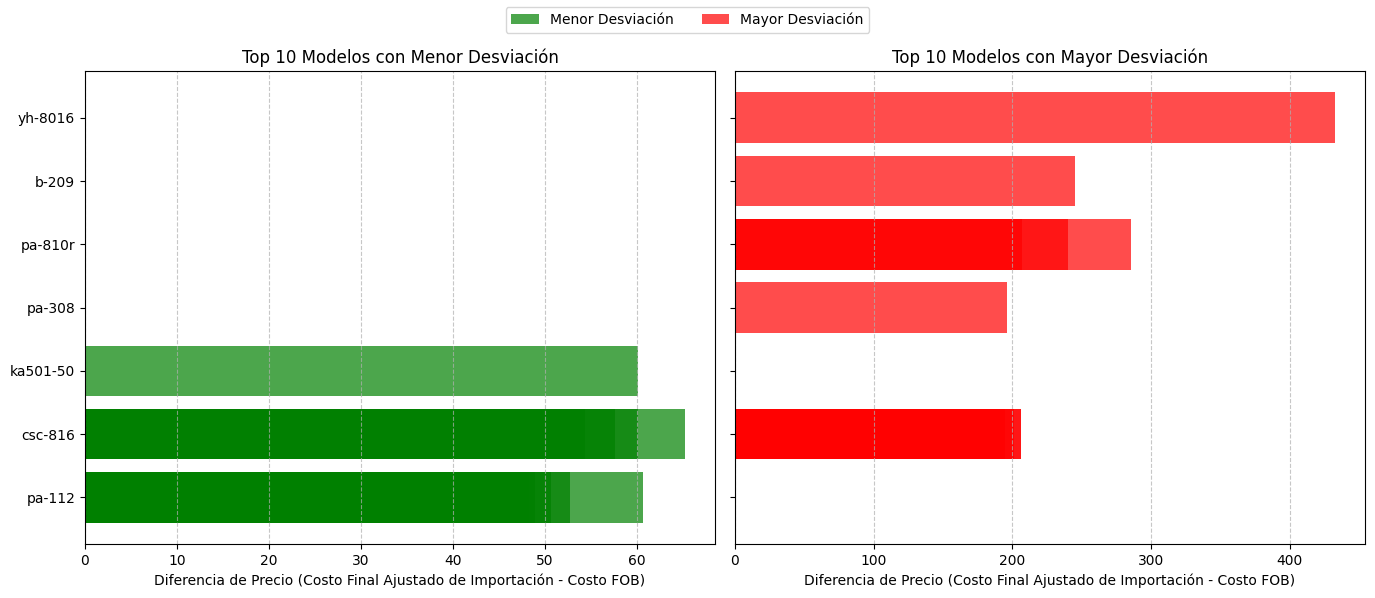

In [4]:
# Calculo la diferencia entre el precio base y el precio final (excluyendo entradas con ad valorem igual a 0)
df_modelos_interes_filtrado = df_modelos_interes[df_modelos_interes['ajustado_advalorem_unit'] > 0].copy()

# Calculo el costo total de importación final (CIF + ad valorem)
df_modelos_interes_filtrado['costo_importacion_final_unit'] = (
    df_modelos_interes_filtrado['ajustado_us$_cif_unit'] +
    df_modelos_interes_filtrado['ajustado_advalorem_unit']
)

# Calculo la diferencia entre el precio FOB y el costo de importación final
df_modelos_interes_filtrado['diferencia_precio'] = (
    df_modelos_interes_filtrado['costo_importacion_final_unit'] - 
    df_modelos_interes_filtrado['ajustado_us$_fob_unit']
)

# Ordeno por la diferencia de precio
df_ordenado = df_modelos_interes_filtrado.sort_values(by='diferencia_precio', ascending=True)

# Obtengo los 10 modelos con menor desviación y los 10 con mayor desviación
top_10_menor_desviacion = df_ordenado.head(10)
top_10_mayor_desviacion = df_ordenado.tail(10)

# Grafico los resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Grafico para los 10 con menor desviación
ax1.barh(top_10_menor_desviacion['modelo'], top_10_menor_desviacion['diferencia_precio'], color='green', alpha=0.7)
ax1.set_xlabel('Diferencia de Precio (Costo Final Ajustado de Importación - Costo FOB)')
ax1.set_title('Top 10 Modelos con Menor Desviación')
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Grafico para los 10 con mayor desviación
ax2.barh(top_10_mayor_desviacion['modelo'], top_10_mayor_desviacion['diferencia_precio'], color='red', alpha=0.7)
ax2.set_xlabel('Diferencia de Precio (Costo Final Ajustado de Importación - Costo FOB)')
ax2.set_title('Top 10 Modelos con Mayor Desviación')
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Establezco una etiqueta y para ambos gráficos
fig.supylabel('')

# Ajusto el layout y agrego la leyenda
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.legend(['Menor Desviación', 'Mayor Desviación'], loc='upper center', ncol=2)

# Muestro el gráfico
plt.show()


#### 4.2. Comentario sobre los Resultados de la Visualización

En los gráficos obtenidos, podemos observar claramente las diferencias entre los modelos con menor y mayor desviación en términos de costo de importación adicional respecto al precio FOB.

- **Modelos con Menor Desviación**: Los modelos como **pa-112**, **csc-816**, y **ka501-50** muestran una menor diferencia entre el costo FOB y el costo de importación final. Esto sugiere que estos modelos, en general, presentan costos adicionales relativamente bajos, lo cual los hace más competitivos desde el punto de vista del costo total de importación.

- **Modelos con Mayor Desviación**: Por otro lado, el modelo **yh-8016** destaca con una diferencia significativa, seguido por **b-209** y **pa-810r**. En particular, el modelo **b-209** corrobora una de las hipótesis planteadas en la Sección 3 sobre la política aduanera de Brasil, donde se especula que el país interpone significantes costos al comercio exterior. Esta diferencia notable podría estar relacionada con mayores costos asociados a regulaciones fiscales y barreras arancelarias impuestas por Brasil, lo cual penaliza la competitividad de los productos de ese origen.

- **Patrones Observados**: Además, observamos que los modelos provenientes de fabricantes taiwaneses como **pa-810r** presentan una desviación considerable, lo cual podría deberse a la calidad de fabricación y los menores procedimientos de seguridad durante el transporte. Esto coincide con nuestra hipótesis sobre la diferencia en los costos de transporte y seguro de los productos de mayor calidad, como los de Beraqua.

En conclusión, los resultados visualizados respaldan algunas de las hipótesis planteadas anteriormente, como los mayores costos fiscales asociados a Brasil y las diferencias en los costos de transporte según la calidad del producto. Estos hallazgos serán fundamentales para decidir qué modelos podrían ser más rentables y sostenibles para futuras importaciones.


#### 4.3. Visualización de Componentes de Costos por Modelo

En esta parte del análisis, profundizaremos en la visualización de cada uno de los componentes del costo para los modelos seleccionados. Específicamente, vamos a representar gráficamente los costos asociados a:

1. **Costo de Flete**: Analizaremos cómo varían los costos de flete para los modelos con menor y mayor desviación.
2. **Costo de Seguro**: Compararemos los costos de seguro unitarios entre los mejores y peores modelos.
3. **Impuesto Ad Valorem**: Observaremos las diferencias en el costo del impuesto ad valorem para cada grupo.

Esta visualización permitirá identificar de manera más específica qué componentes de los costos son los responsables de las mayores disparidades y ayudará a determinar si el mayor costo total de importación se debe a uno o varios factores específicos. A continuación, se presenta el código para generar las gráficas que detallan cada uno de estos componentes del costo.


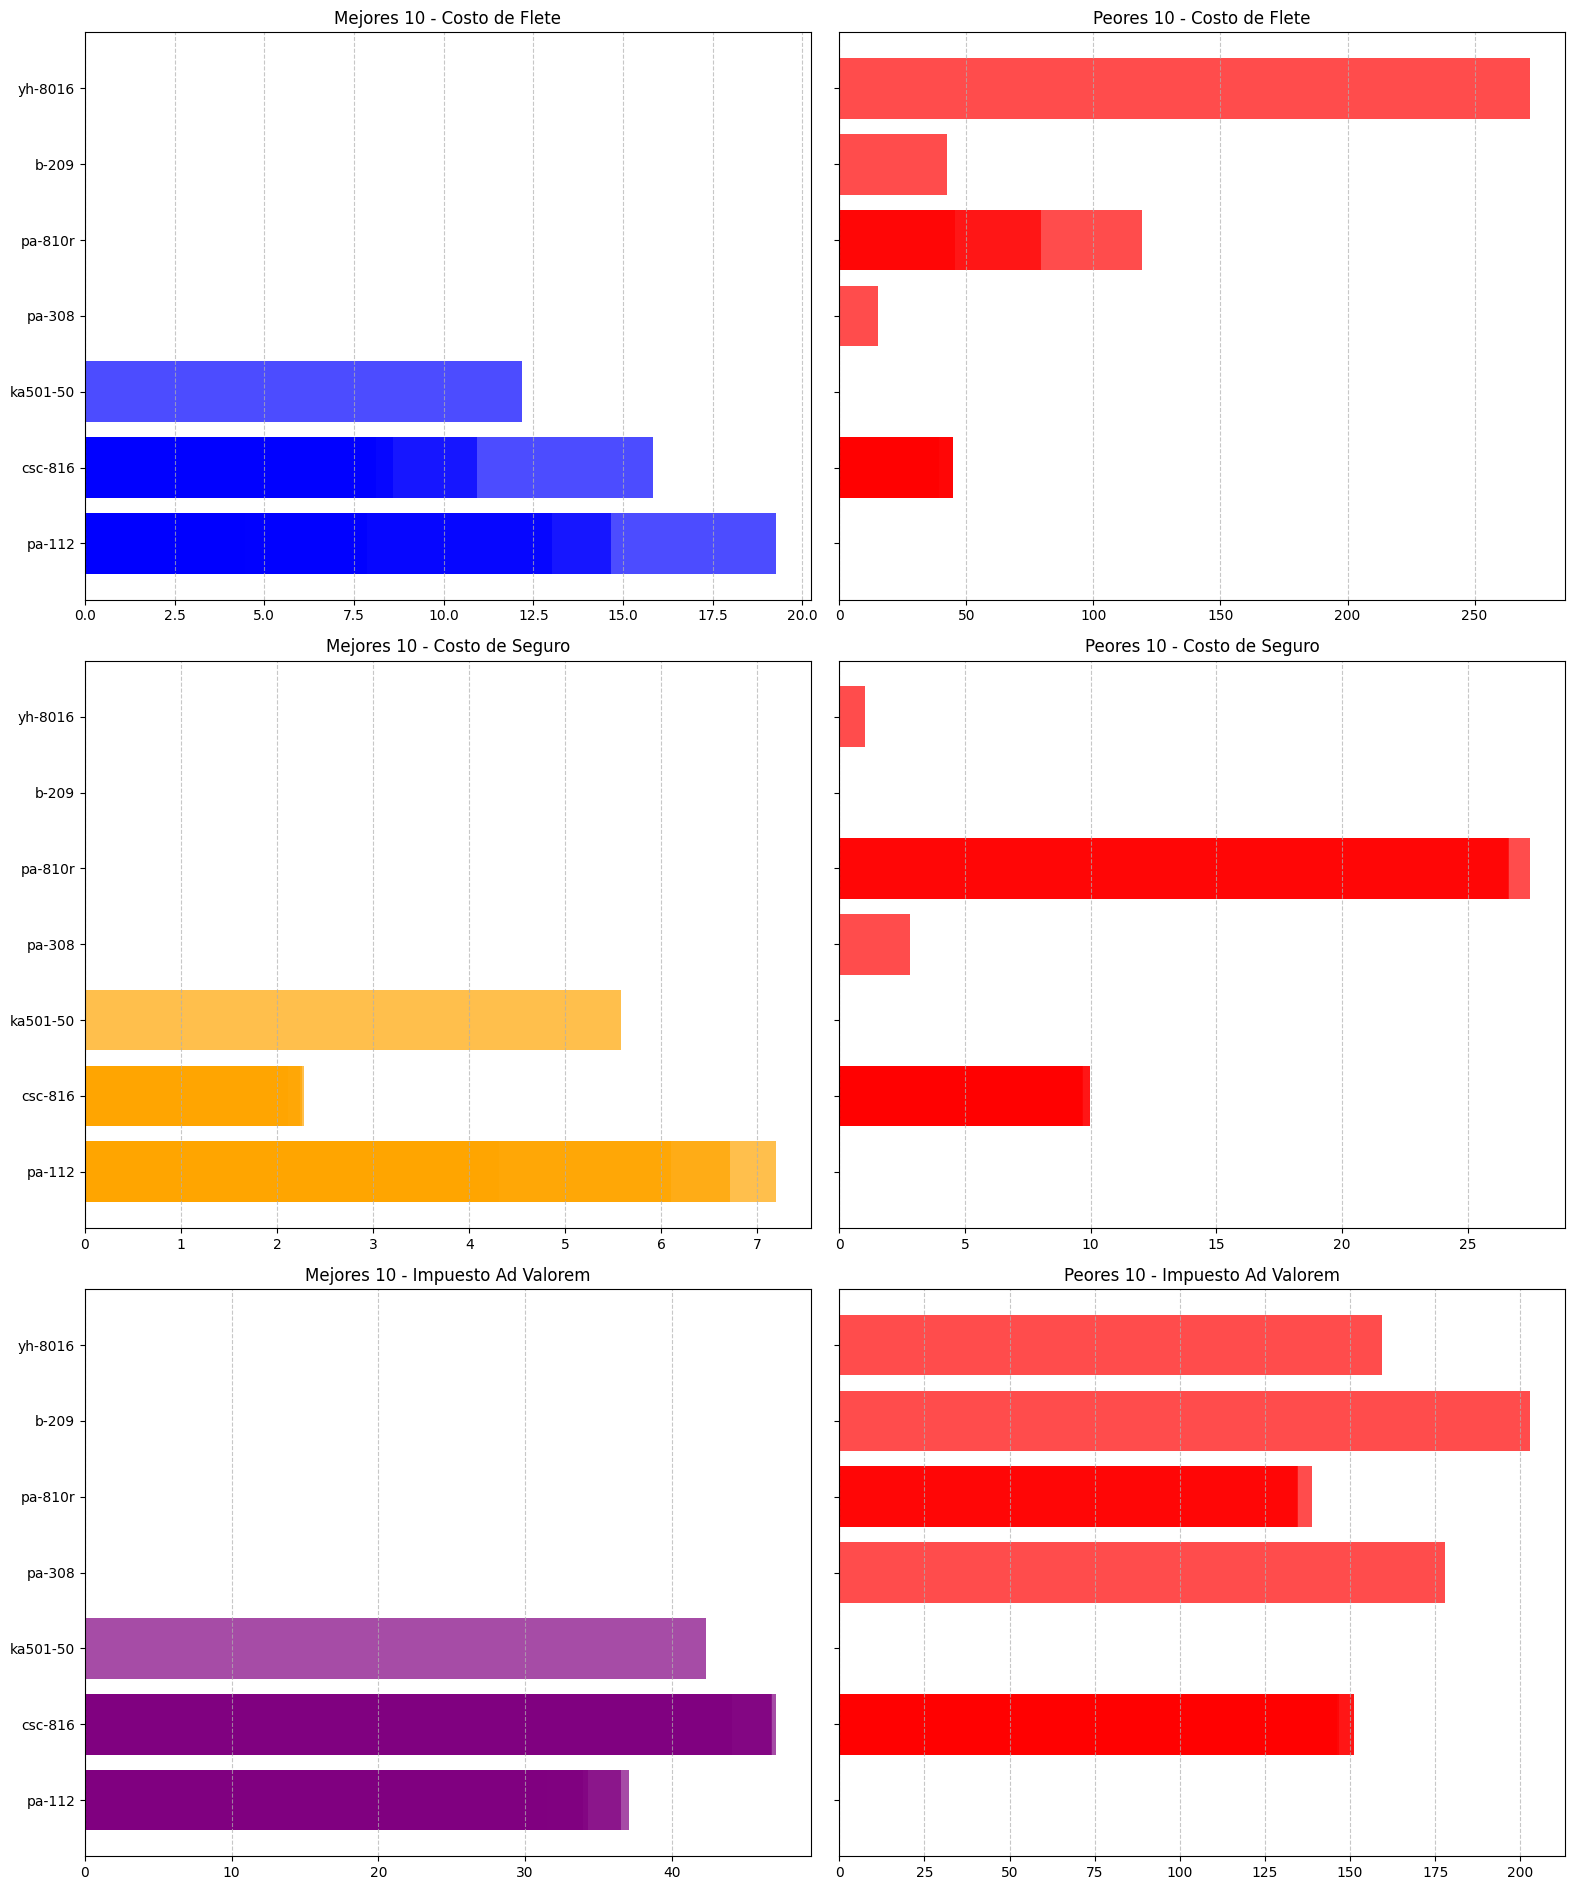

In [5]:
# Gráficos adicionales para el costo de flete, costo de seguro, impuesto ad valorem y precio base (FOB)
fig, axes = plt.subplots(3, 2, figsize=(16, 20), sharey='row')

# Gráfico de costo de flete
axes[0, 0].barh(top_10_menor_desviacion['modelo'], top_10_menor_desviacion['ajustado_us$_flete_unit'], color='blue', alpha=0.7)
axes[0, 0].set_xlabel('')
axes[0, 0].set_title('Mejores 10 - Costo de Flete')
axes[0, 0].grid(axis='x', linestyle='--', alpha=0.7)

axes[0, 1].barh(top_10_mayor_desviacion['modelo'], top_10_mayor_desviacion['ajustado_us$_flete_unit'], color='red', alpha=0.7)
axes[0, 1].set_xlabel('')
axes[0, 1].set_title('Peores 10 - Costo de Flete')
axes[0, 1].grid(axis='x', linestyle='--', alpha=0.7)

# Gráfico de costo de seguro
axes[1, 0].barh(top_10_menor_desviacion['modelo'], top_10_menor_desviacion['ajustado_us$_seguro_unit'], color='orange', alpha=0.7)
axes[1, 0].set_xlabel('')
axes[1, 0].set_title('Mejores 10 - Costo de Seguro')
axes[1, 0].grid(axis='x', linestyle='--', alpha=0.7)

axes[1, 1].barh(top_10_mayor_desviacion['modelo'], top_10_mayor_desviacion['ajustado_us$_seguro_unit'], color='red', alpha=0.7)
axes[1, 1].set_xlabel('')
axes[1, 1].set_title('Peores 10 - Costo de Seguro')
axes[1, 1].grid(axis='x', linestyle='--', alpha=0.7)

# Gráfico de impuesto ad valorem
axes[2, 0].barh(top_10_menor_desviacion['modelo'], top_10_menor_desviacion['ajustado_advalorem_unit'], color='purple', alpha=0.7)
axes[2, 0].set_xlabel('')
axes[2, 0].set_title('Mejores 10 - Impuesto Ad Valorem')
axes[2, 0].grid(axis='x', linestyle='--', alpha=0.7)

axes[2, 1].barh(top_10_mayor_desviacion['modelo'], top_10_mayor_desviacion['ajustado_advalorem_unit'], color='red', alpha=0.7)
axes[2, 1].set_xlabel('')
axes[2, 1].set_title('Peores 10 - Impuesto Ad Valorem')
axes[2, 1].grid(axis='x', linestyle='--', alpha=0.7)

# Establezco una etiqueta y común para todos los gráficos
fig.supylabel('')

# Ajusto el layout
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Muestro los gráficos
plt.show()


#### 4.4. Comentarios sobre los Resultados de la Visualización de Componentes de Costos

En los gráficos anteriores, se destacan algunas observaciones importantes:

- **Costo de Flete**: En los modelos con menor desviación, se aprecia que los costos de flete son moderados y están bastante balanceados entre los distintos modelos. Sin embargo, en los modelos con mayor desviación, como **yh-8016** y **b-209**, los costos de flete se disparan, lo cual refleja el impacto de la distancia o complejidad logística en el costo total de importación.

- **Costo de Seguro**: Los costos de seguro también varían significativamente. Los modelos como **pa-810r** presentan un costo de seguro elevado, lo cual podría deberse a la naturaleza del equipo o las condiciones del transporte. En contraste, los modelos **pa-112** y **csc-816** tienen costos de seguro mucho más bajos, lo cual podría estar asociado a menores riesgos percibidos durante el transporte.

- **Impuesto Ad Valorem**: El componente más destacable es el **impuesto ad valorem** del modelo **b-209**, que es exorbitante en comparación con los otros modelos. Esto refuerza la hipótesis planteada sobre el peso tarifario que Brasil ejerce sobre el comercio exterior. El hecho de que un modelo de origen brasileño, que pertenece al grupo Beraqua, esté sujeto a tales cargas fiscales sugiere que la política aduanera de Brasil podría estar penalizando la actividad comercial que, paradójicamente, podría beneficiar su propia economía si los productos fueran más competitivos en el mercado internacional.
